In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


## Dataset Description

A synthetic customer dataset was created containing numerical features such as annual income, spending score, and purchase frequency. The dataset is clean, numeric, and suitable for clustering analysis.


In [3]:
np.random.seed(42)

data = {
    "Annual_Income": np.random.normal(60000, 15000, 300),
    "Spending_Score": np.random.normal(50, 20, 300),
    "Purchase_Frequency": np.random.normal(10, 3, 300)
}

df = pd.DataFrame(data)
df.head()


,Annual_Income,Spending_Score,Purchase_Frequency
0,67450.712295,33.420100,12.270966
1,57926.035482,38.796379,7.233504
2,69715.328072,64.945872,12.608818
3,82845.447846,62.207405,14.066914
4,56487.699379,49.581968,11.240305


## Exploratory Data Analysis (EDA)

EDA was performed to understand data distribution and relationships between variables.


In [4]:
df.describe()


,Annual_Income,Spending_Score,Purchase_Frequency
count,300.000000,300.000000,300.000000
mean,59916.771614,49.570200,10.246582
std,14762.905335,19.232357,2.990029
min,11380.989899,0.567110,1.909340
25%,49751.310900,35.911896,8.285574
50%,60888.291963,49.624707,10.128222
75%,69399.865820,62.326750,12.134409
max,117790.972360,111.577616,17.897146


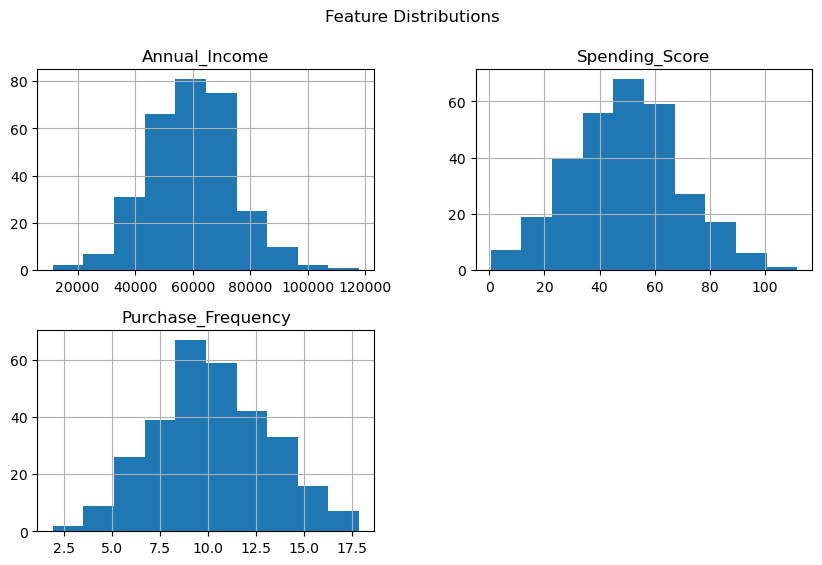

In [5]:
# Histograms
df.hist(figsize=(10,6))
plt.suptitle("Feature Distributions")
plt.show()


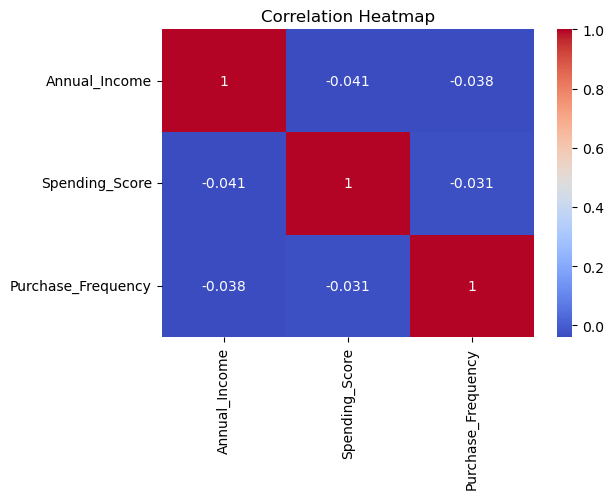

In [6]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Missing Values and Outliers

The dataset was checked for missing values and outliers using boxplots.


In [7]:
df.isna().sum()


Annual_Income         0
Spending_Score        0
Purchase_Frequency    0
dtype: int64

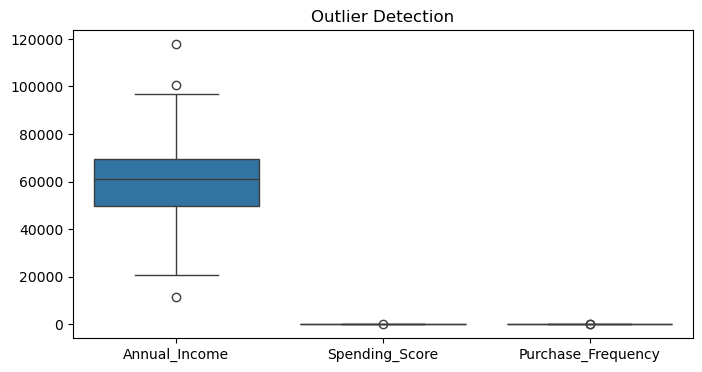

In [8]:
# Boxplot for outliers
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [10]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

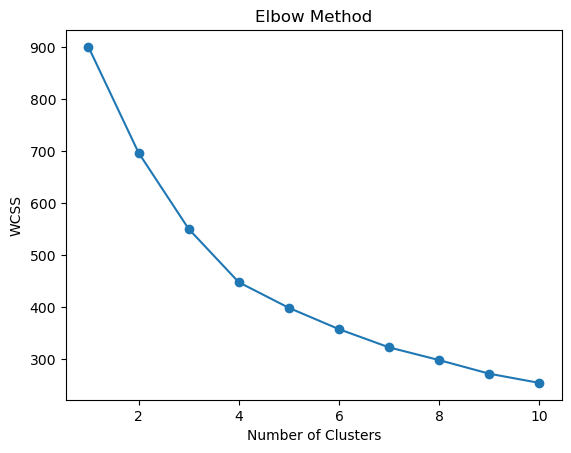

In [11]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

df["KMeans_Cluster"] = kmeans_labels
silhouette_score(scaled_data, kmeans_labels)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


np.float64(0.2332115356011081)

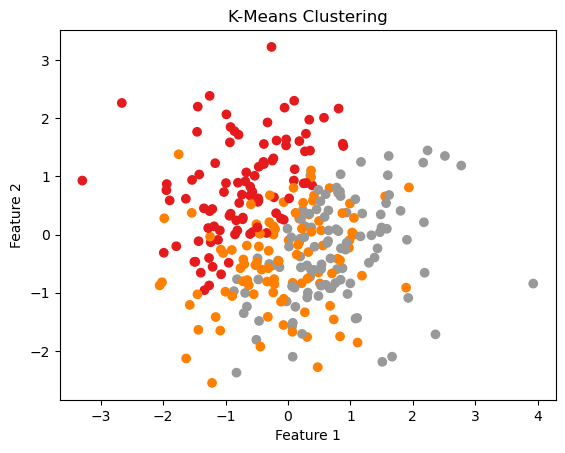

In [13]:
plt.scatter(
    scaled_data[:,0],
    scaled_data[:,1],
    c=kmeans_labels,
    cmap="Set1"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.show()


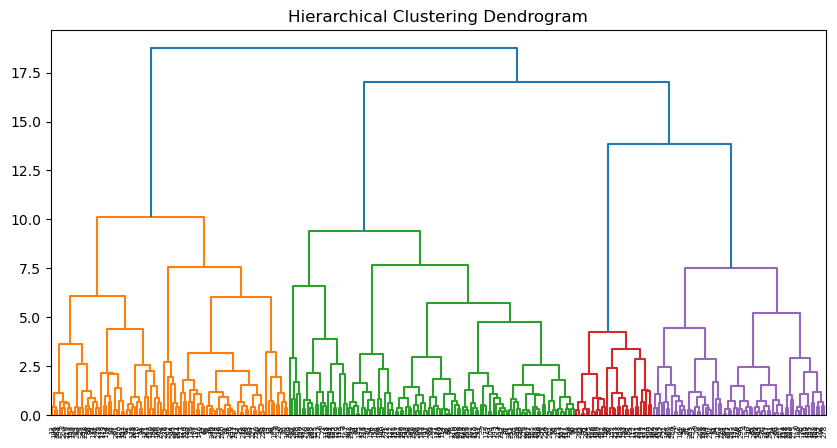

In [14]:
linked = linkage(scaled_data, method="ward")
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [15]:
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(scaled_data)

df["Hierarchical_Cluster"] = hc_labels


In [16]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

df["DBSCAN_Cluster"] = dbscan_labels


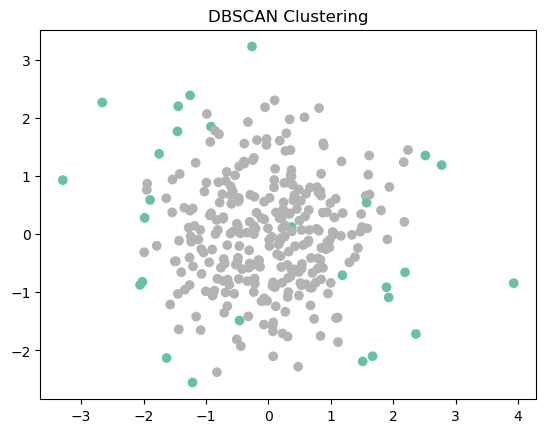

In [17]:
plt.scatter(
    scaled_data[:,0],
    scaled_data[:,1],
    c=dbscan_labels,
    cmap="Set2"
)
plt.title("DBSCAN Clustering")
plt.show()


In [ ]:
## Cluster Interpretation

- Cluster 0: Low spending and low purchase frequency customers.
- Cluster 1: Medium income and moderate spending customers.
- Cluster 2: High income and high spending customers.

Hierarchical clustering produced similar clusters, validating K-Means results.
DBSCAN successfully identified dense clusters and detected noise points.
